# K-Means Clustering

## Introduction
If a dataset do not have any ground truth associated with it, then unsupervised algorithms are used to find some structures in it. These structures can be different types of data pattern or group of data. K-Means clustering is most commonly used unsupervised learning algorithm to find groups in unlabeled data. Here $K$ represents the number of groups or clusters and the process of creating these groups is known as *clustering*. 

## Uses
* **Search engines**: Search engines group results together 
* **Customer segmentation**: It can be used to create customer clusters based on demographic information and behavioral data.
* **Social network analysis**: To find groups of people with specific interest to direct personalized ads.
* **Inventory management**: Create inventory clusters based on sales number and manufacturing capacity.

## Inner Working of K-Means Clustering
K-Means is often referred to as *Lloyd's algorithm*. Refer below plot where there are two clusters ($K=2$)
![Clustering example](https://raw.githubusercontent.com/satishgunjal/images/master/Two_Cluster_Centroid_With_Datapoints.png)

### Algorithm
![Flowchart K-Means](https://raw.githubusercontent.com/satishgunjal/images/master/Inner_Working_K_Means.png)

### Centroid Random Initialization Trap
Since we have to randomly pick the cluster centroids, it's initialization may affect the final outcome of the clustering. 
![Centroid Random Initialization Trap](https://raw.githubusercontent.com/satishgunjal/images/master/Centroid_Random_Initialization_Trap.png)

### Random Initialization Guidelines
* Number of cluster centroids should be less than the number of training examples.
* To avoid local optima issue, try to do multiple random initialization of centroids.
* Multiple random initialization technique is more effective when we have small number of clusters.
* Similarly for large number of clusters, few random initialization are sufficient.

### Choosing the Number of Clusters
#### 1. Visualization
To find the number of clusters manually by data visualization is one of the most common method. Domain knowledge and proper understanding of given data also help to make more informed decisions. Since its a manual exercise, there is always a scope for ambiguous observations.

#### 2. Elblow Method
In Elbow method we run the K-Means algorithm multiple times in a loop, with an increasing number of cluster choice (say from 1 to 10) and then plotting a clustering score as a function of the number of clusters. Clustering score is nothing but **sum of squared distances** of samples to their closest cluster center. Elbow is the point on the plot where clustering score (distortion) slows down, and the value of cluster at that point gives us the optimum number of clusters to have. But sometimes we don't get clear elbow point on the plot, in such cases its very hard to finalize the number of clusters.
![elbow method](https://raw.githubusercontent.com/satishgunjal/images/master/K_Means_Elbow_Method.png)

### Advantages:
* One of the simplest algorithm to understand and implement.
* Relatively more efficient.
* Gives better results when there is less data overlapping.

### Disadvantages:
* Number of clusters need to be defined by the user.
* Doesn't work well with overlapping data.
* Unable to handle noisy data and outliers.
* Algorithms fails for non-linear data set.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
print('Shape of the data:', df.shape)

df.head()

Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Unlabelled Mall Data')

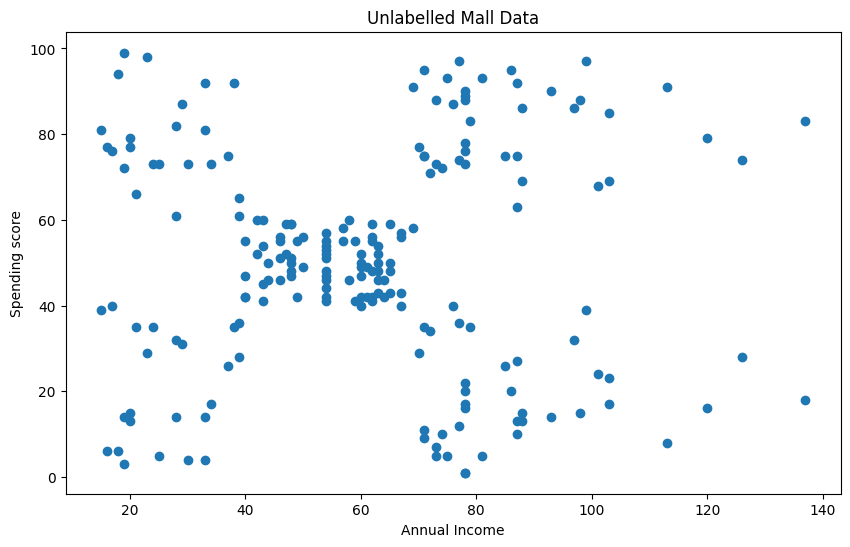

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Unlabelled Mall Data')

In [4]:
X = np.array(df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']])
X.shape

(200, 2)

Text(0, 0.5, 'Clustering score')

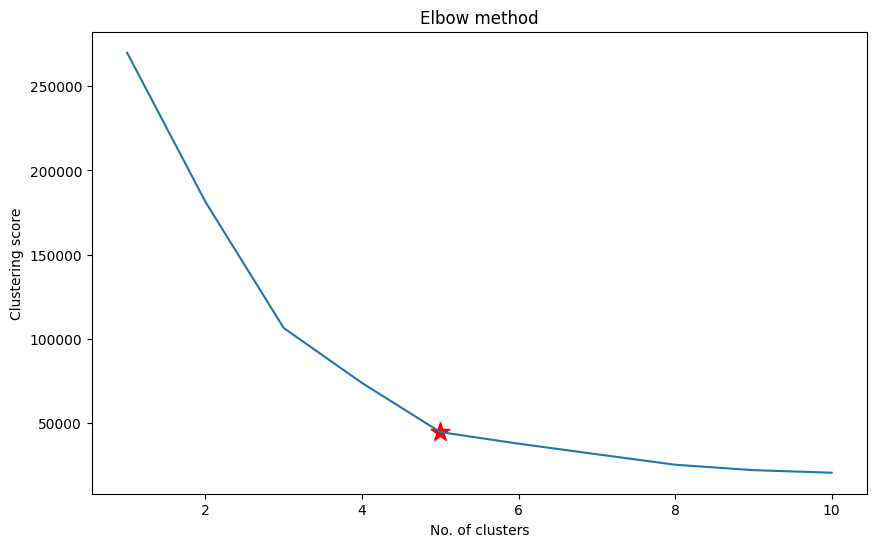

In [5]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42, n_init='auto')
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5, clustering_score[4], s=200, c='red', marker='*')
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Clustering score')

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(X)

pred = kmeans.predict(X)

In [9]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'])
print('Number of data points in each cluster:', df['Cluster'].value_counts())

df

Number of data points in each cluster: Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


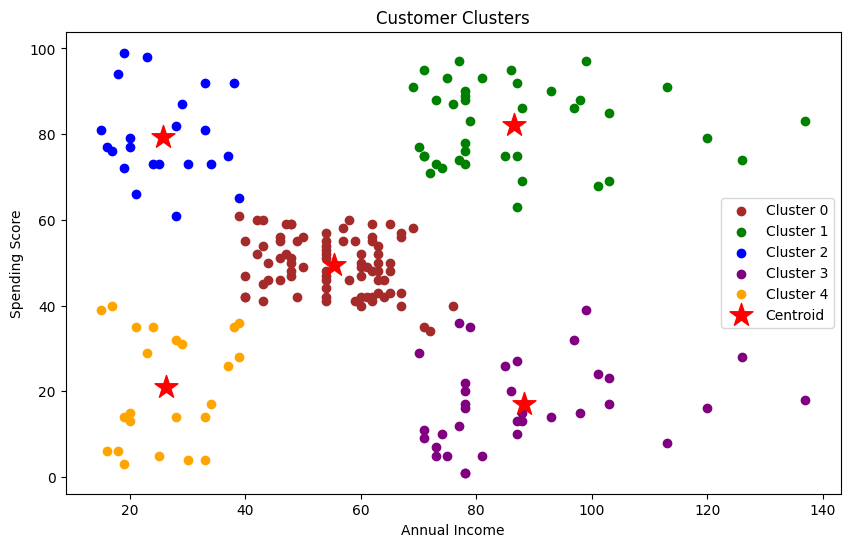

In [10]:
plt.figure(figsize=(10, 6))
colors = ['brown', 'green', 'blue', 'purple', 'orange']

for i in range(5):
    plt.scatter(X[pred==i, 0], X[pred==i, 1], c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.legend();


#### Inner working: GIF
![gif](https://raw.githubusercontent.com/satishgunjal/images/master/K_means_Clustering.gif)